In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
from nltk.corpus import stopwords
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
import string
data = pd.read_json("./Sarcasm_Headlines_Dataset_v2.json",lines=True)

In [3]:
import nltk
nltk.download('stopwords')

stwrds = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# remove duplicate headlines
data=data.drop(data[data['headline'].duplicated()].index,axis=0)
sarc_cnt = len(data.query('is_sarcastic==1'))
non_sarc_cnt = len(data.query('is_sarcastic==0'))

# Summary of sarcastic lines
print(f'There are {sarc_cnt} sarcastic headlines and {non_sarc_cnt} non-sarcastic headlines')
# import stopwords from nltk
stwrds = set(stopwords.words('english'))
ps = PorterStemmer()
# method to clean a given headline by lowercasing the string, removing spaces, and removing stopwords
def clean_headlines(headline):
    headline = headline.lower()
    headline_split = headline.split()
    cleaned_headline = []
    for word in headline_split:
        if word not in stwrds and word not in string.punctuation:
            cleaned_headline.append(ps.stem(word))
    cleaned_line = " ".join(cleaned_headline)
    return cleaned_line
data['cleaned'] = data['headline'].apply(clean_headlines)

There are 13552 sarcastic headlines and 14951 non-sarcastic headlines


In [5]:
labels=data.is_sarcastic 
features=data.cleaned

In [6]:
feature_train,feature_test, labels_train,labels_test = train_test_split(features,labels ,test_size =0.2)

In [7]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(feature_train)

vocab_size = len(tokenizer.word_index)
print(vocab_size)

train_sequences = tokenizer.texts_to_sequences(feature_train)
test_sequences = tokenizer.texts_to_sequences(feature_test)

21892


In [8]:
maxlen=max([len(i) for i in train_sequences])

In [9]:
train_padded = pad_sequences(train_sequences, maxlen=maxlen,  padding='post')
test_padded = pad_sequences(test_sequences, maxlen=maxlen,  padding='post')

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
clf=RandomForestClassifier(n_estimators=100)

In [12]:
clf.fit(train_padded,labels_train)

RandomForestClassifier()

In [13]:
print(classification_report(labels_test, clf.predict(test_padded)))

              precision    recall  f1-score   support

           0       0.63      0.70      0.67      2999
           1       0.62      0.55      0.58      2702

    accuracy                           0.63      5701
   macro avg       0.63      0.62      0.62      5701
weighted avg       0.63      0.63      0.63      5701



In [14]:
from tqdm import tqdm

In [15]:
for i in tqdm (range (50,150,10)):
    # if i in[0,1,10]: continue
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(train_padded,labels_train)
    print("Number of trees before max voting: ", i)
    print(classification_report(labels_test, clf.predict(test_padded)))

 10%|█         | 1/10 [00:02<00:26,  2.90s/it]

Number of trees before max voting:  50
              precision    recall  f1-score   support

           0       0.62      0.70      0.66      2999
           1       0.61      0.53      0.57      2702

    accuracy                           0.62      5701
   macro avg       0.62      0.61      0.61      5701
weighted avg       0.62      0.62      0.62      5701



 20%|██        | 2/10 [00:06<00:27,  3.38s/it]

Number of trees before max voting:  60
              precision    recall  f1-score   support

           0       0.63      0.71      0.67      2999
           1       0.62      0.53      0.58      2702

    accuracy                           0.63      5701
   macro avg       0.63      0.62      0.62      5701
weighted avg       0.63      0.63      0.62      5701



 30%|███       | 3/10 [00:11<00:29,  4.18s/it]

Number of trees before max voting:  70
              precision    recall  f1-score   support

           0       0.63      0.70      0.67      2999
           1       0.62      0.54      0.58      2702

    accuracy                           0.63      5701
   macro avg       0.63      0.62      0.62      5701
weighted avg       0.63      0.63      0.62      5701



 40%|████      | 4/10 [00:16<00:26,  4.47s/it]

Number of trees before max voting:  80
              precision    recall  f1-score   support

           0       0.63      0.71      0.67      2999
           1       0.63      0.54      0.58      2702

    accuracy                           0.63      5701
   macro avg       0.63      0.63      0.62      5701
weighted avg       0.63      0.63      0.63      5701



 50%|█████     | 5/10 [00:21<00:23,  4.77s/it]

Number of trees before max voting:  90
              precision    recall  f1-score   support

           0       0.63      0.71      0.67      2999
           1       0.63      0.54      0.58      2702

    accuracy                           0.63      5701
   macro avg       0.63      0.63      0.63      5701
weighted avg       0.63      0.63      0.63      5701

Number of trees before max voting:  100


 60%|██████    | 6/10 [00:27<00:20,  5.13s/it]

              precision    recall  f1-score   support

           0       0.63      0.70      0.66      2999
           1       0.62      0.54      0.58      2702

    accuracy                           0.62      5701
   macro avg       0.62      0.62      0.62      5701
weighted avg       0.62      0.62      0.62      5701

Number of trees before max voting:  110


 70%|███████   | 7/10 [00:34<00:16,  5.50s/it]

              precision    recall  f1-score   support

           0       0.63      0.71      0.67      2999
           1       0.63      0.55      0.58      2702

    accuracy                           0.63      5701
   macro avg       0.63      0.63      0.63      5701
weighted avg       0.63      0.63      0.63      5701

Number of trees before max voting:  120


 80%|████████  | 8/10 [00:41<00:12,  6.05s/it]

              precision    recall  f1-score   support

           0       0.63      0.70      0.66      2999
           1       0.62      0.54      0.58      2702

    accuracy                           0.63      5701
   macro avg       0.63      0.62      0.62      5701
weighted avg       0.63      0.63      0.62      5701

Number of trees before max voting:  130


 90%|█████████ | 9/10 [00:49<00:06,  6.66s/it]

              precision    recall  f1-score   support

           0       0.63      0.70      0.67      2999
           1       0.62      0.55      0.59      2702

    accuracy                           0.63      5701
   macro avg       0.63      0.63      0.63      5701
weighted avg       0.63      0.63      0.63      5701

Number of trees before max voting:  140


100%|██████████| 10/10 [00:57<00:00,  5.76s/it]

              precision    recall  f1-score   support

           0       0.64      0.71      0.67      2999
           1       0.63      0.55      0.59      2702

    accuracy                           0.63      5701
   macro avg       0.63      0.63      0.63      5701
weighted avg       0.63      0.63      0.63      5701



Text(0, 0.5, 'Testing Accuracy')

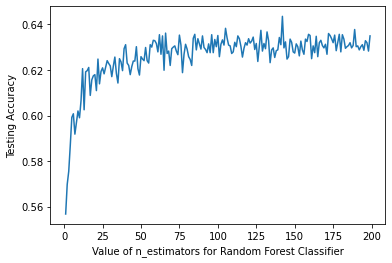

In [18]:
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(train_padded, labels_train)
    scores.append(accuracy_score(labels_test, rfc.predict(test_padded)))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [19]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

Text(0.5, 257.44, 'Predicted label')

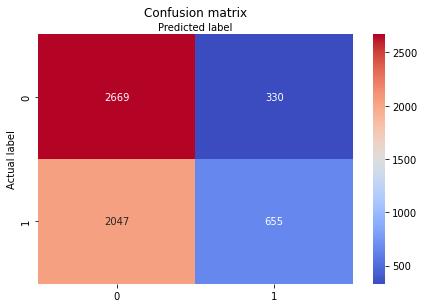

In [20]:
pipeline= Pipeline([
   ('scaler',StandardScaler()),
    ('pca', PCA()),
   ('clf',RandomForestClassifier(n_estimators=50,max_depth=3,min_samples_leaf=3, max_features=6, random_state=42))
])
pipeline.fit(train_padded,labels_train)

#Predicting y for X_val
y_pred = pipeline.predict(test_padded)
cm = confusion_matrix(labels_test,y_pred)

class_names=[1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

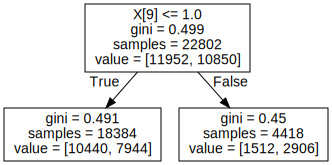

In [22]:
dt= DecisionTreeClassifier(max_depth=1,min_samples_leaf=3, max_features=6, random_state=42)
dt.fit(train_padded, labels_train)


chosen_tree=pipeline['clf'].estimators_[20]

# cols=train_padded

exported=tree.export_graphviz(dt)
#  decision_tree=dt,
#     out_file=None,
#     feature_names=train_padded,
#     precision=1,
#     class_names=['Not play','play'],
#     filled=True

graph=graphviz.Source(exported)
display(graph)

In [23]:
print ("Looking for the best parameters to get best results in the random forest classifier")

parameter_grid={'n_estimators':[1,2,3,4,5],'max_depth':[2,4,6,8,10],'min_samples_leaf':[1,2,4],'max_features':[1,2,3,4,5,6,7,8]}


number_models=4
random_RandomForest_class=RandomizedSearchCV(
    estimator=pipeline['clf'],
    param_distributions=parameter_grid,
    n_iter=number_models,
    scoring='accuracy',
    n_jobs=2,
    cv=4,
    refit=True,
    return_train_score=True)

random_RandomForest_class.fit(train_padded,labels_train)
y_pred=random_RandomForest_class.predict(test_padded)

print("Accuracy Score",accuracy_score(labels_test,y_pred));
print("Best params",random_RandomForest_class.best_params_)
print("Best score",random_RandomForest_class.best_score_)


Looking for the best parameters to get best results in the random forest classifier
Accuracy Score 0.6128749342220663
Best params {'n_estimators': 4, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': 10}
Best score 0.6138935228353289


Principle component analysis show the importance of each feature


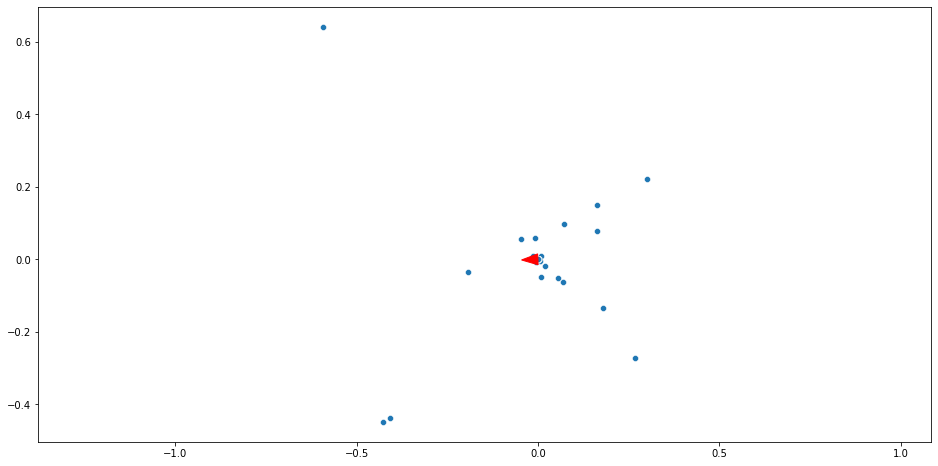

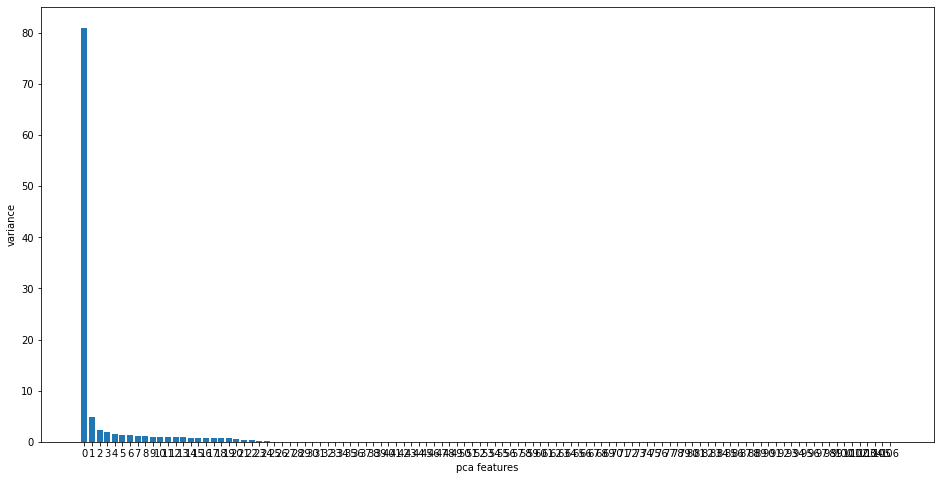

In [24]:
print('Principle component analysis show the importance of each feature')
pca=pipeline['pca']
pca_features=pca.components_
xs = pca_features[:,0]

fig,ax = plt.subplots(figsize=(16,8))
# Assign 1st column of pca_features: ys
ys = pca_features[:,1]
# Scatter plot xs vs ys
sns.scatterplot(x=xs, y=ys)

mean = pca.mean_
first_pc = pca.components_[0,:]
# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0],mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

plt.axis('equal')
plt.show()

fig,ax = plt.subplots(figsize=(16,8))
features = range(pca.n_components_)
ax.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('pca features')
plt.show()
